In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from matplotlib.colors import ListedColormap,LinearSegmentedColormap

plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({"font.size":6})

clist = ["#7E8EB0", "#8F8DA5", "#A290A0", "#B59098", "#C89292", "#DD928C", "#EE9583", "#F0A180", "#F3AF7E", "#F3BC7B", "#F9CA78", "#FCD878", "#FBE474"]
newcmap = LinearSegmentedColormap.from_list('chaos',clist)

In [10]:
data = pd.read_excel(r"G:\\weather extreme\\Revision\\data need zonal stats\\RESULT230720\\RESULT230720\\trend\\total_ssp370_slope.xlsx")
p_value = pd.read_excel(r"G:\\weather extreme\\Revision\\data need zonal stats\\RESULT230720\\RESULT230720\\trend\\total_ssp370_pvalue.xlsx")

ylabels = list(data.iloc[:, 0])
ylabels[0] = "CDHW"

data = data.drop(columns=["ANT*", "ARC*"])
columns = list(data.columns)

for i in range(len(data.columns)):
    if "*" in columns[i]:
        columns[i] = str(columns[i])[:-1]
        
data.columns = columns
data.iloc[:, 1:] = data.iloc[:, 1:]/1e6
data = data.drop(columns=["Unnamed: 0"])
data.index = ylabels

In [11]:
p_value = p_value.drop(columns=["ANT*", "ARC*"])
p_value.columns = columns
p_value = p_value.drop(columns=["Unnamed: 0"])
p_value.index = ylabels
p_value_fig1 = p_value.loc[["PRCPTOT", "RX1D", "R50", "SPH"], :]
p_value_fig2 = p_value.loc[["WD", "HW", "WN", "CDHW"], :]

In [12]:
data_fig1 = data.loc[["PRCPTOT", "RX1D", "R50", "SPH"], :]
data_fig2 = data.loc[["WD", "HW", "WN", "CDHW"], :]

In [13]:
pop_data_2020 = pd.read_excel(r"G:\weather extreme\Revision\data need zonal stats\RESULT230720\RESULT230720\EXPOSURE_SHARE\pop_ssp370.xlsx", sheet_name="ssp370_2020_median")
prob_data_2020 = pd.read_excel(r"G:\weather extreme\Revision\data need zonal stats\RESULT230720\RESULT230720\EXPOSURE_SHARE\prob_ssp370.xlsx", sheet_name="ssp370_2020_median")
pop_data_2090 = pd.read_excel(r"G:\weather extreme\Revision\data need zonal stats\RESULT230720\RESULT230720\EXPOSURE_SHARE\pop_ssp370.xlsx", sheet_name="ssp370_2090_median")
prob_data_2090 = pd.read_excel(r"G:\weather extreme\Revision\data need zonal stats\RESULT230720\RESULT230720\EXPOSURE_SHARE\prob_ssp370.xlsx", sheet_name="ssp370_2090_median")
total_2020 = pop_data_2020 + prob_data_2020
total_2090 = pop_data_2090 + prob_data_2090

total_2020 = total_2020.drop(columns=["ANT*", "ARC*"])
total_2020.columns = columns
total_2020.iloc[:, 1:] = total_2020.iloc[:, 1:]/1e6
total_2020 = total_2020.drop(columns=["Unnamed: 0"])
total_2020.index = ylabels

total_2090 = total_2090.drop(columns=["ANT*", "ARC*"])
total_2090.columns = columns
total_2090.iloc[:, 1:] = total_2090.iloc[:, 1:]/1e6
total_2090 = total_2090.drop(columns=["Unnamed: 0"])
total_2090.index = ylabels

In [14]:
#share proportion
share_data = pd.read_excel(r"D:\l2\Future global population exposure\Supplementary material 2.xlsx", sheet_name="ssp370")
PRCPTOT_prob_share = []
RX1D_prob_share = []
R50_prob_share = []
WD_prob_share = []
HW_prob_share = []
WN_prob_share = []
SPH_prob_share = []
CDHW_prob_share = []
regions = []

for i in range(len(share_data)):
    if i % 8 == 0:
        regions.append(share_data.loc[i, "Region"])
        PRCPTOT_prob_share.append(share_data.loc[i, "Trend from record-breaking probability increases"])
    elif i % 8 == 1:
        RX1D_prob_share.append(share_data.loc[i, "Trend from record-breaking probability increases"])
    elif i % 8 == 2:
        R50_prob_share.append(share_data.loc[i, "Trend from record-breaking probability increases"])
    elif i % 8 == 3:
        WD_prob_share.append(share_data.loc[i, "Trend from record-breaking probability increases"])
    elif i % 8 == 4:
        HW_prob_share.append(share_data.loc[i, "Trend from record-breaking probability increases"])
    elif i % 8 == 5:
        WN_prob_share.append(share_data.loc[i, "Trend from record-breaking probability increases"])
    elif i % 8 == 6:
        SPH_prob_share.append(share_data.loc[i, "Trend from record-breaking probability increases"])
    elif i % 8 == 7:
        CDHW_prob_share.append(share_data.loc[i, "Trend from record-breaking probability increases"])

PRCPTOT = np.array(PRCPTOT_prob_share)
RX1D = np.array(RX1D_prob_share)
R50 = np.array(R50_prob_share)
WD = np.array(WD_prob_share)
HW = np.array(HW_prob_share)
WN = np.array(WN_prob_share)
SPH = np.array(SPH_prob_share)
CDHW = np.array(CDHW_prob_share)

PRCPTOT[PRCPTOT<0] = 0
PRCPTOT[PRCPTOT>1] = 1
R50[R50<0] = 0
R50[R50>1] = 1
RX1D[RX1D<0] = 0
RX1D[RX1D>1] = 1
WD[WD<0] = 0
WD[WD>1] = 1
HW[HW<0] = 0
HW[HW>1] = 1
WN[WN<0] = 0
WN[WN>1] = 1
SPH[SPH<0] = 0
SPH[SPH>1] = 1
CDHW[CDHW<0] = 0
CDHW[CDHW>1] = 1

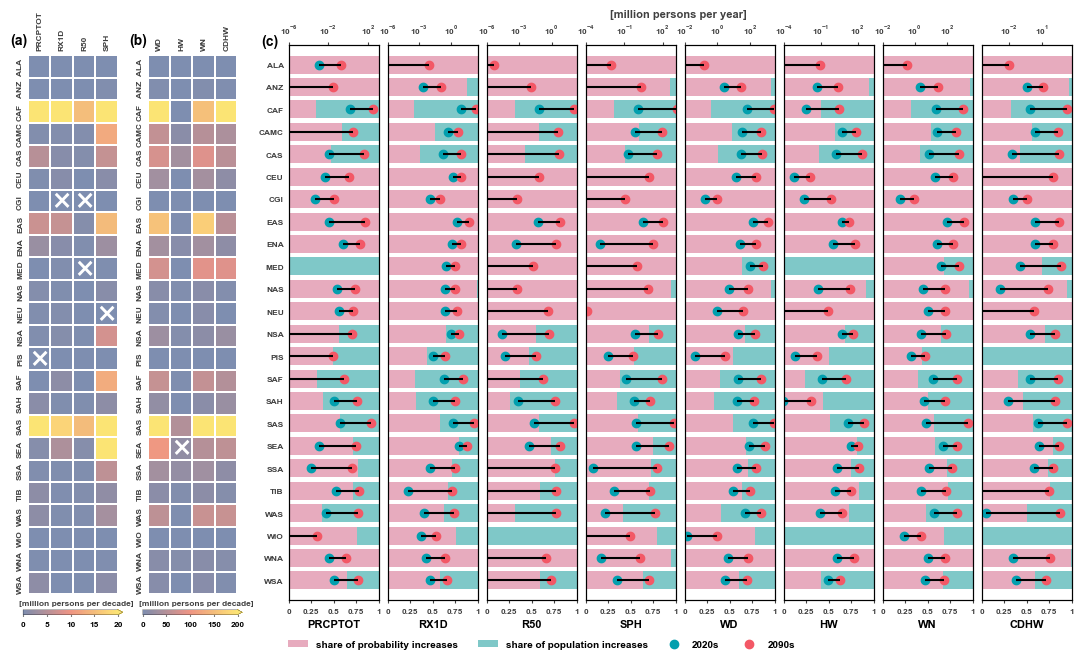

In [15]:
# figure
fig = plt.figure(figsize=(9,8))
# plot heatmap

ax1 = fig.add_subplot(1, 6, 1)
h = sb.heatmap(data_fig1.T,  cmap=newcmap, vmin= 0, vmax=20, square=True,
           linewidth=0.3, cbar=False, cbar_kws={"shrink": .5, "orientation": "horizontal", "fraction": 0.1, "aspect": 20, "pad":0.02, "extend": "max", "ticks": [0, 50, 100, 150, 200]})
# xticks
ax1.xaxis.tick_top()
xticks_labels = ['PRCPTOT', 'RX1D', 'R50', 'SPH']
ax1.set_xticks(np.arange(4) + .5, xticks_labels, rotation=90)
# axis labels
plt.xlabel('')
plt.ylabel('')

ax1.tick_params("x",which="major",
               length=0, width = 0,
               colors = "0.25")
ax1.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax1.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
cbar = h.figure.colorbar(h.collections[0],shrink=1, orientation="horizontal", fraction=0.1, aspect=20, pad=.025, extend="max", ticks=[0, 5, 10, 15, 20])
cbar.ax.tick_params(size=1)
cbar.outline.set_linewidth(0.2)
ax1.text(-0.2, 1.02, "(a)", fontsize=10, transform=ax1.transAxes)

widthx = 0
widthy = 0.5

parr = np.array(p_value_fig1.T)
rarr = np.array(data_fig1.T)
for m in ax1.get_xticks():
    for n in ax1.get_yticks():
        pv = (parr[int(n),int(m)])
        rv = (rarr[int(n),int(m)])
        
        if pv >= 0.05:
            ax1.text(m+widthx,n+widthy,'×',ha = 'center',color = 'white', fontsize=25, fontweight=10)



ax2 = fig.add_subplot(1, 6, 2)
h = sb.heatmap(data_fig2.T,  cmap=newcmap, vmin= 0, vmax=200, square=True,
           linewidth=0.3, cbar=False, cbar_kws={"shrink": .5, "orientation": "horizontal", "fraction": 0.1, "aspect": 20, "pad":0.02, "extend": "max", "ticks": [0, 50, 100, 150, 200]})
# xticks
ax2.xaxis.tick_top()
xticks_labels = ['WD', 'HW', 'WN', 'CDHW']
ax2.set_xticks(np.arange(4) + .5, xticks_labels, rotation=90)
# axis labels
plt.xlabel('')
plt.ylabel('')

ax2.tick_params("x",which="major",
               length=0, width = 0,
               colors = "0.25")
ax2.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax2.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
cbar = h.figure.colorbar(h.collections[0],shrink=1, orientation="horizontal", fraction=0.1, aspect=20, pad=.025, extend="max", ticks=[0, 50, 100, 150, 200])
cbar.ax.tick_params(size=1)
cbar.outline.set_linewidth(0.2)
ax2.text(-0.2, 1.02, "(b)", fontsize=10, transform=ax2.transAxes)
ax2.text(-0.1, -0.021, "[million persons per decade]", transform=ax2.transAxes, color="0.25")
ax1.text(-0.1, -0.021, "[million persons per decade]", transform=ax1.transAxes, color="0.25")

parr = np.array(p_value_fig2.T)
rarr = np.array(data_fig2.T)
for m in ax2.get_xticks():
    for n in ax2.get_yticks():
        pv = (parr[int(n),int(m)])
        rv = (rarr[int(n),int(m)])
        if pv >= 0.05:
            ax2.text(m+widthx,n+widthy,'×',ha = 'center',color = 'white', fontsize=25, fontweight=10)
        

##百分比图


ax3= plt.axes([0.42, 0.199, 0.1, 0.694])
# ax4= plt.axes([0.52, 0.19, 0.1, 0.7], sharex=ax3, sharey=ax3)

ax33 = ax3.twiny()
ax33.set_xscale("log")
ax33.set_xlim(0.000001, 1200)
ax33.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax3.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax3.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax3.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
width = 0.8
ax3.barh(regions[::-1], (PRCPTOT)[::-1], width,label='share of probability increases', color="#D0587E", zorder=1, alpha=0.5)
ax3.barh(regions[::-1], (1-PRCPTOT)[::-1], width, left=PRCPTOT[::-1], label='share of population increases', color="#009392", zorder=1, alpha=0.5)
ax33.hlines(y=total_2090.columns[::-1], xmin=total_2020.loc["PRCPTOT", :][::-1], xmax=total_2090.loc["PRCPTOT", :][::-1], color='k', alpha=1)
ax33.scatter(total_2020.loc["PRCPTOT", :][::-1], total_2090.columns[::-1], color='#029FAE', alpha=1, label='2020s',zorder=0)
ax33.scatter(total_2090.loc["PRCPTOT", :][::-1], total_2090.columns[::-1], color='#F35866', alpha=1 , label='2090s',zorder=0)
ax3.set_xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
# ax33.set_xlabel("[million persons per year]")
ax3.text(-0.3, 1.0, "(c)", fontsize=10, transform=ax3.transAxes)
# ax3.text(-0.22, -0.04, "Population", color="0.25", transform=ax3.transAxes)
# ax3.text(0.72, -0.04, "Probability", color="0.25", transform=ax3.transAxes)


ax3.margins(0, 0.02)
ax3.set_xlabel("PRCPTOT", fontsize=8)

#ax4
ax4= plt.axes([0.53, 0.199, 0.1, 0.694])
# ax4= plt.axes([0.52, 0.19, 0.1, 0.7], sharex=ax3, sharey=ax3)

ax44 = ax4.twiny()
ax44.set_xscale("log")
ax44.set_xlim(0.000001, 300)

width = 0.8
ax4.barh(regions[::-1], (RX1D)[::-1], width,label='share of probability increases', color="#D0587E", zorder=1, alpha=0.5)
ax4.barh(regions[::-1], (1-RX1D)[::-1], width, left=RX1D[::-1], label='share of population increases', color="#009392", zorder=1, alpha=0.5)
ax44.hlines(y=total_2090.columns[::-1], xmin=total_2020.loc["RX1D", :][::-1], xmax=total_2090.loc["RX1D", :][::-1], color='k', alpha=1)
ax44.scatter(total_2020.loc["RX1D", :][::-1], total_2090.columns[::-1], color='#029FAE', alpha=1, label='2020s',zorder=0)
ax44.scatter(total_2090.loc["RX1D", :][::-1], total_2090.columns[::-1], color='#F35866', alpha=1 , label='2090s',zorder=0)
ax4.set_xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
# ax44.set_xlabel("[million persons per year]")
# ax4.text(-0.3, 1.0, "(d)", fontsize=10, transform=ax4.transAxes)
# ax4.text(-0.22, -0.04, "Population", color="0.25", transform=ax4.transAxes)
# ax4.text(0.72, -0.04, "Probability", color="0.25", transform=ax4.transAxes)
ax44.axes.yaxis.set_ticks([])
ax44.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax4.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax4.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax4.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
ax44.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax44.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax44.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")

ax4.margins(0, 0.02)
ax4.set_xlabel("RX1D", fontsize=8)


#ax5
ax5= plt.axes([0.64, 0.199, 0.1, 0.694])
# ax5= plt.axes([0.52, 0.19, 0.1, 0.7], sharex=ax3, sharey=ax3)

ax55 = ax5.twiny()
ax55.set_xscale("log")
ax55.set_xlim(0.000001, 200)
ax55.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax5.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax5.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax5.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
width = 0.8
ax5.barh(regions[::-1], (R50)[::-1], width,label='share of probability increases', color="#D0587E", zorder=1, alpha=0.5)
ax5.barh(regions[::-1], (1-R50)[::-1], width, left=R50[::-1], label='share of population increases', color="#009392", zorder=1, alpha=0.5)
ax55.hlines(y=total_2090.columns[::-1], xmin=total_2020.loc["R50", :][::-1], xmax=total_2090.loc["R50", :][::-1], color='k', alpha=1)
ax55.scatter(total_2020.loc["R50", :][::-1], total_2090.columns[::-1], color='#029FAE', alpha=1, label='2020s',zorder=0)
ax55.scatter(total_2090.loc["R50", :][::-1], total_2090.columns[::-1], color='#F35866', alpha=1 , label='2090s',zorder=0)
ax5.set_xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
# ax55.set_xlabel("[million persons per year]")
# ax5.text(-0.3, 1.0, "(d)", fontsize=10, transform=ax5.transAxes)
# ax5.text(-0.22, -0.04, "Population", color="0.25", transform=ax5.transAxes)
# ax5.text(0.72, -0.04, "Probability", color="0.25", transform=ax5.transAxes)
ax55.axes.yaxis.set_ticks([])
ax55.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax5.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax5.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax5.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
ax55.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax55.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax55.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")

ax5.margins(0, 0.02)
ax5.set_xlabel("R50", fontsize=8)

#ax6
ax6= plt.axes([0.75, 0.199, 0.1, 0.694])
# ax6= plt.axes([0.52, 0.19, 0.1, 0.7], sharex=ax3, sharey=ax3)

ax66 = ax6.twiny()
ax66.set_xscale("log")
ax66.set_xlim(0.0001, 1000)
ax66.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax6.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax6.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax6.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
width = 0.8
ax6.barh(regions[::-1], (SPH)[::-1], width,label='share of probability increases', color="#D0587E", zorder=1, alpha=0.5)
ax6.barh(regions[::-1], (1-SPH)[::-1], width, left=SPH[::-1], label='share of population increases', color="#009392", zorder=1, alpha=0.5)
ax66.hlines(y=total_2090.columns[::-1], xmin=total_2020.loc["SPH", :][::-1], xmax=total_2090.loc["SPH", :][::-1], color='k', alpha=1)
ax66.scatter(total_2020.loc["SPH", :][::-1], total_2090.columns[::-1], color='#029FAE', alpha=1, label='2020s',zorder=0)
ax66.scatter(total_2090.loc["SPH", :][::-1], total_2090.columns[::-1], color='#F35866', alpha=1 , label='2090s',zorder=0)
ax6.set_xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
# ax66.set_xlabel("[million persons per year]")
# ax6.text(-0.3, 1.0, "(d)", fontsize=10, transform=ax6.transAxes)
# ax6.text(-0.22, -0.04, "Population", color="0.25", transform=ax6.transAxes)
# ax6.text(0.72, -0.04, "Probability", color="0.25", transform=ax6.transAxes)
ax66.axes.yaxis.set_ticks([])
ax66.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax6.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax6.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax6.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
ax66.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax66.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax66.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")

ax6.margins(0, 0.02)
ax6.set_xlabel("SPH", fontsize=8)


#ax7
ax7= plt.axes([0.86, 0.199, 0.1, 0.694])
# ax7= plt.axes([0.52, 0.19, 0.1, 0.7], sharex=ax3, sharey=ax3)

ax77 = ax7.twiny()
ax77.set_xscale("log")
ax77.set_xlim(0.01, 3000)
ax77.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax7.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax7.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax7.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
width = 0.8
ax7.barh(regions[::-1], (WD)[::-1], width,label='share of probability increases', color="#D0587E", zorder=1, alpha=0.5)
ax7.barh(regions[::-1], (1-WD)[::-1], width, left=WD[::-1], label='share of population increases', color="#009392", zorder=1, alpha=0.5)
ax77.hlines(y=total_2090.columns[::-1], xmin=total_2020.loc["WD", :][::-1], xmax=total_2090.loc["WD", :][::-1], color='k', alpha=1)
ax77.scatter(total_2020.loc["WD", :][::-1], total_2090.columns[::-1], color='#029FAE', alpha=1, label='2020s',zorder=0)
ax77.scatter(total_2090.loc["WD", :][::-1], total_2090.columns[::-1], color='#F35866', alpha=1 , label='2090s',zorder=0)
ax7.set_xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
# ax77.set_xlabel("[million persons per year]")
# ax7.text(-0.3, 1.0, "(d)", fontsize=10, transform=ax7.transAxes)
ax7.text(-0.83, 1.05, "[million persons per year]", transform=ax7.transAxes, fontsize=8, color="0.25")
# ax7.text(0.72, -0.04, "Probability", color="0.25", transform=ax7.transAxes)
ax77.axes.yaxis.set_ticks([])
ax77.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax7.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax7.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax7.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
ax77.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax77.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax77.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")

ax7.margins(0, 0.02)
ax7.set_xlabel("WD", fontsize=8)



#ax8
ax8= plt.axes([0.97, 0.199, 0.1, 0.694])
# ax8= plt.axes([0.52, 0.19, 0.1, 0.7], sharex=ax3, sharey=ax3)

ax88 = ax8.twiny()
ax88.set_xscale("log")
ax88.set_xlim(0.0001, 2000)
ax88.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax8.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax8.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax8.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
width = 0.8
ax8.barh(regions[::-1], (HW)[::-1], width,label='share of probability increases', color="#D0587E", zorder=1, alpha=0.5)
ax8.barh(regions[::-1], (1-HW)[::-1], width, left=HW[::-1], label='share of population increases', color="#009392", zorder=1, alpha=0.5)
ax88.hlines(y=total_2090.columns[::-1], xmin=total_2020.loc["HW", :][::-1], xmax=total_2090.loc["HW", :][::-1], color='k', alpha=1)
ax88.scatter(total_2020.loc["HW", :][::-1], total_2090.columns[::-1], color='#029FAE', alpha=1, label='2020s',zorder=0)
ax88.scatter(total_2090.loc["HW", :][::-1], total_2090.columns[::-1], color='#F35866', alpha=1 , label='2090s',zorder=0)
ax8.set_xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
# ax88.set_xlabel("[million persons per year]")
# ax8.text(-0.3, 1.0, "(d)", fontsize=10, transform=ax8.transAxes)
# ax8.text(-0.22, -0.04, "Population", color="0.25", transform=ax8.transAxes)
# ax8.text(0.72, -0.04, "Probability", color="0.25", transform=ax8.transAxes)
ax88.axes.yaxis.set_ticks([])
ax88.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax8.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax8.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax8.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
ax88.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax88.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax88.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")

ax8.margins(0, 0.02)
ax8.set_xlabel("HW", fontsize=8)


#ax9
ax9= plt.axes([1.08, 0.199, 0.1, 0.694])
# ax9= plt.axes([0.52, 0.19, 0.1, 0.7], sharex=ax3, sharey=ax3)

ax99 = ax9.twiny()
ax99.set_xscale("log")
ax99.set_xlim(0.01, 4000)
ax99.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax9.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax9.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax9.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
width = 0.8
ax9.barh(regions[::-1], (WN)[::-1], width,label='share of probability increases', color="#D0587E", zorder=1, alpha=0.5)
ax9.barh(regions[::-1], (1-WN)[::-1], width, left=WN[::-1], label='share of population increases', color="#009392", zorder=1, alpha=0.5)
ax99.hlines(y=total_2090.columns[::-1], xmin=total_2020.loc["WN", :][::-1], xmax=total_2090.loc["WN", :][::-1], color='k', alpha=1)
ax99.scatter(total_2020.loc["WN", :][::-1], total_2090.columns[::-1], color='#029FAE', alpha=1, label='2020s',zorder=0)
ax99.scatter(total_2090.loc["WN", :][::-1], total_2090.columns[::-1], color='#F35866', alpha=1 , label='2090s',zorder=0)
ax9.set_xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
# ax99.set_xlabel("[million persons per year]")
# ax9.text(-0.3, 1.0, "(d)", fontsize=10, transform=ax9.transAxes)
# ax9.text(-0.22, -0.04, "Population", color="0.25", transform=ax9.transAxes)
# ax9.text(0.72, -0.04, "Probability", color="0.25", transform=ax9.transAxes)
ax99.axes.yaxis.set_ticks([])
ax99.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax9.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax9.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax9.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
ax99.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax99.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax99.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")

ax9.margins(0, 0.02)
ax9.set_xlabel("WN", fontsize=8)
# plt.savefig("test.jpg", dpi=300)

#ax10
ax10= plt.axes([1.19, 0.199, 0.1, 0.694])
# ax10= plt.axes([0.52, 0.19, 0.1, 0.7], sharex=ax3, sharey=ax3)

ax100 = ax10.twiny()
ax100.set_xscale("log")
# ax100.set_xlim(0.0001, 3000)
ax100.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax10.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax10.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax10.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
width = 0.8
ax10.barh(regions[::-1], (CDHW)[::-1], width,label='share of probability increases', color="#D0587E", zorder=1, alpha=0.5)
ax10.barh(regions[::-1], (1-CDHW)[::-1], width, left=CDHW[::-1], label='share of population increases', color="#009392", zorder=1, alpha=0.5)
ax100.hlines(y=total_2090.columns[::-1], xmin=total_2020.loc["CDHW", :][::-1], xmax=total_2090.loc["CDHW", :][::-1], color='k', alpha=1)
ax100.scatter(total_2020.loc["CDHW", :][::-1], total_2090.columns[::-1], color='#029FAE', alpha=1, label='2020s',zorder=0)
ax100.scatter(total_2090.loc["CDHW", :][::-1], total_2090.columns[::-1], color='#F35866', alpha=1 , label='2090s',zorder=0)
ax10.set_xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
# ax100.set_xlabel("[million persons per year]")
# ax10.text(-0.3, 1.0, "(d)", fontsize=10, transform=ax10.transAxes)
# ax10.text(-0.22, -0.04, "Population", color="0.25", transform=ax10.transAxes)
# ax10.text(0.72, -0.04, "Probability", color="0.25", transform=ax10.transAxes)
ax100.axes.yaxis.set_ticks([])
ax100.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax10.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax10.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax10.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
ax100.tick_params("x",which="major",
               length=2, width = 0.8,
               colors = "0.25")
ax100.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax100.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")

ax10.margins(0, 0.02)
ax10.set_xlabel("CDHW", fontsize=8)


ax3.legend( loc='center', bbox_to_anchor=(2, -0.08), ncol=2, fontsize="large", facecolor=None, edgecolor="white")
ax33.legend( loc='center', bbox_to_anchor=(4.9, -0.08), ncol=2,  fontsize="large", facecolor=None, edgecolor="white")

plt.savefig(r"G:\weather extreme\mapping_result\regional_trend_ssp370_revised.jpg", dpi=300, bbox_inches="tight")